In [1]:
!pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [30]:
metodologia = ctrl.Antecedent(np.arange(0, 11), 'metodologia')
material = ctrl.Antecedent(np.arange(0, 101, 10), 'material')
conocimiento = ctrl.Antecedent(np.arange(0,7,1), 'conocimiento')
eval = ctrl.Consequent(np.arange(0, 51, 10), 'eval')

In [43]:
metodologia['malo']=fuzz.zmf(metodologia.universe,5,7)
metodologia['regular']=fuzz.trimf(metodologia.universe,[6, 7,8])
metodologia['bueno']=fuzz.trimf(metodologia.universe,[5, 10, 10])

In [44]:
material['malo']=fuzz.zmf(material.universe,50,70)
material['bueno']=fuzz.smf(material.universe,50,70)

In [45]:
conocimiento['basico']=fuzz.zmf(conocimiento.universe,1,2)
conocimiento['medio']=fuzz.trapmf(conocimiento.universe,[1, 2,3,4])
conocimiento['experto']=fuzz.smf(conocimiento.universe,3,4)

In [46]:
eval['regular'] = fuzz.zmf(eval.universe, 0,20)
eval['bueno'] = fuzz.trapmf(eval.universe, [10, 20, 30,40])
eval['excelente'] = fuzz.smf(eval.universe, 30,50)

Definir el consecuente
Definir perceptible

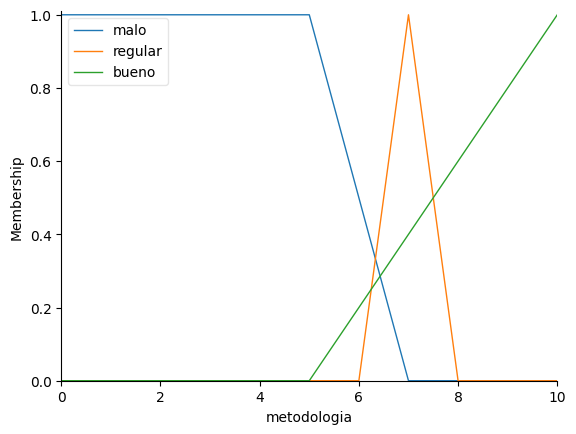

In [16]:
metodologia.view()

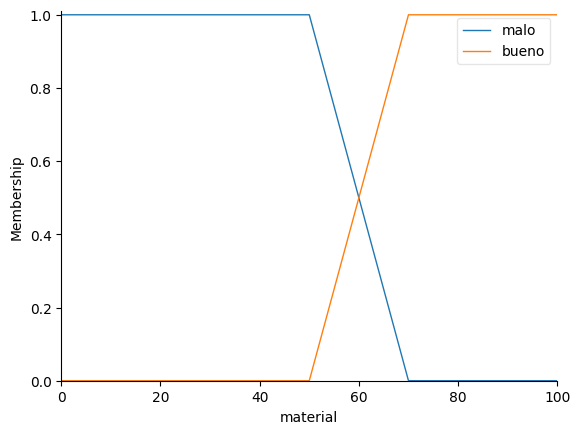

In [21]:
material.view()

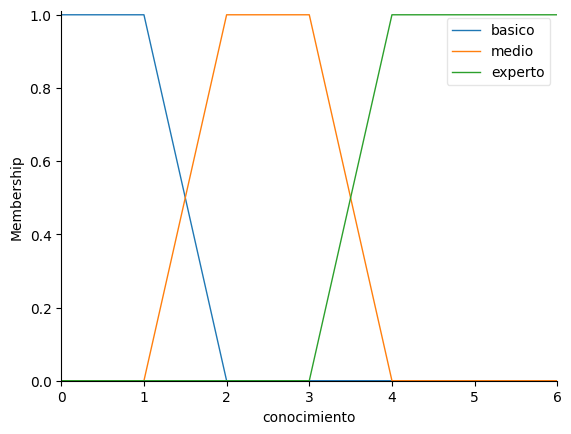

In [38]:
conocimiento.view()

In [48]:
rule1 =ctrl.Rule( metodologia ['malo'] & material ['malo'] & conocimiento ['basico'] , eval ['regular'] );
rule2 =ctrl.Rule( metodologia ['malo'] & material ['malo'] & conocimiento ['medio'] , eval ['regular'] );
rule3 =ctrl.Rule( metodologia ['malo'] & material ['malo'] & conocimiento ['experto'] , eval ['regular'] );
rule4 =ctrl.Rule( metodologia ['malo'] & material ['bueno'] & conocimiento ['basico'] , eval ['regular'] );
rule5 =ctrl.Rule( metodologia ['malo'] & material ['bueno'] & conocimiento ['medio'] , eval ['regular'] );
rule6 =ctrl.Rule( metodologia ['malo'] & material ['bueno'] & conocimiento ['experto'] , eval ['regular'] );
rule7 =ctrl.Rule( metodologia ['regular'] & material ['malo'] & conocimiento ['basico'] , eval ['regular'] );
rule8 =ctrl.Rule( metodologia ['regular'] & material ['malo'] & conocimiento ['medio'] , eval ['regular'] );
rule9 =ctrl.Rule( metodologia ['regular'] & material ['malo'] & conocimiento ['experto'] , eval ['regular'] );
rule10 =ctrl.Rule( metodologia ['regular'] & material ['bueno'] & conocimiento ['basico'] , eval ['regular'] );
rule11 =ctrl.Rule( metodologia ['regular'] & material ['bueno'] & conocimiento ['medio'] , eval ['regular'] );
rule12 =ctrl.Rule( metodologia ['regular'] & material ['bueno'] & conocimiento ['experto'] , eval ['regular'] );
rule13 =ctrl.Rule( metodologia ['bueno'] & material ['malo'] & conocimiento ['basico'] , eval ['bueno'] );
rule14 =ctrl.Rule( metodologia ['bueno'] & material ['malo'] & conocimiento ['medio'] , eval ['bueno'] );
rule15 =ctrl.Rule( metodologia ['bueno'] & material ['malo'] & conocimiento ['experto'] , eval ['bueno'] );
rule16 =ctrl.Rule( metodologia ['bueno'] & material ['bueno'] & conocimiento ['basico'] , eval ['bueno'] );
rule17 =ctrl.Rule( metodologia ['bueno'] & material ['bueno'] & conocimiento ['medio'] , eval ['excelente'] );
rule18 =ctrl.Rule( metodologia ['bueno'] & material ['bueno'] & conocimiento ['experto'] , eval ['excelente'] );

In [52]:
evaluacion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,
                                   rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18])


evaluar = ctrl.ControlSystemSimulation(evaluacion_ctrl)


evaluar.input['metodologia'] = 8.0
evaluar.input['material'] = 80.0
evaluar.input['conocimiento'] = 6.0

evaluar.compute()

print (evaluar.output['eval'])

42.57142857142857
